In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
def plot_hist_net(graph):
  degrees = [graph.degree(n) for n in graph.nodes()]
  plt.hist(degrees[0:100], bins=50)
  plt.xlabel('Degree  or Number of Links')
  plt.ylabel('Number of Nodes')
  plt.title('Degree Distribution')
  plt.show()

In [ ]:
def calculate_network_metrics(graph):
    metrics = {}

    # Basic graph properties
    metrics['num_nodes'] = nx.number_of_nodes(graph)
    metrics['num_edges'] = nx.number_of_edges(graph)
    metrics['density'] = nx.density(graph)

    # Degree distribution
    degrees = dict(graph.degree())
    metrics['avg_degree'] = sum(degrees.values()) / len(degrees)
    metrics['min_degree'] = min(degrees.values())
    metrics['max_degree'] = max(degrees.values())
    metrics['degree_std'] = nx.degree_assortativity_coefficient(graph)

    # Centrality measures
    metrics['betweenness_centrality'] = nx.betweenness_centrality(graph)
    metrics['closeness_centrality'] = nx.closeness_centrality(graph)
    metrics['eigenvector_centrality'] = nx.eigenvector_centrality(graph)
    metrics['page_rank'] = nx.pagerank(graph)

    df_metrics = pd.DataFrame.from_dict(metrics, orient='index')

    return print(df_metrics)

In [ ]:
def save_colab_network(G, node):
  edges = list(G.edges(node))
  save_as = node + '.xlsx'

  # Create a DataFrame from the edges
  df_ = pd.DataFrame(edges, columns=['Investigador', 'Colaborador'])

  # Save the DataFrame to an Excel file
  df_.to_excel(save_as, index=False)



In [ ]:
# Cargue de datos almacenados en Mongo 05/05/2023
data = pd.read_csv('collection_javeriana_scopus.csv')
df = data.copy()

In [ ]:
df.shape

(10382, 36)

In [ ]:
df.dtypes.value_counts()

object     31
int64       3
float64     2
dtype: int64

In [ ]:
df.columns

Index(['affiliation_city', 'affiliation_country', 'affilname', 'afid',
       'aggregationType', 'article_number', 'authkeywords', 'author_afids',
       'author_count', 'author_ids', 'author_names', 'citedby_count',
       'coverDate', 'coverDisplayDate', 'creator', 'description', 'doi',
       'eIssn', 'eid', 'freetoread', 'freetoreadLabel', 'fund_acr', 'fund_no',
       'fund_sponsor', 'issn', 'issueIdentifier', 'openaccess', 'pageRange',
       'pii', 'publicationName', 'pubmed_id', 'source_id', 'subtype',
       'subtypeDescription', 'title', 'volume'],
      dtype='object')

In [ ]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,10372,10373,10374,10375,10376,10377,10378,10379,10380,10381
affiliation_city,;Bogota;Madrid,Bogota;Ghent;San Andres Island;Medellin,Bogota;Bogota;Alicante,Bogota;Bogota,Cali;Copenhagen;Goiania;Stony Brook;Prague Pra...,Cali;Cali;Pasadena,Valledupar;Bogota;Bogota;Nantes;Valledupar,Bogota;,Bogota;Bogota;Bogota;Bogota;Kingston;Bogota;Ca...,Cali;Bogota;Cali,...,Bogota,Bogota;;Bogota,Ibague;Bogota,Bogota;Bogota,Bogota,Bogota,Bogota;Linkoping;Ann Arbor;Boston;Omaha;Boston...,Bogota,Barquisimeto;Bogota,Bogota;Galesburg
affiliation_country,Colombia;Colombia;Spain,Colombia;Belgium;Colombia;Colombia,Colombia;Colombia;Spain,Colombia;Colombia,Colombia;Denmark;Brazil;United States;Czech Re...,Colombia;Colombia;United States,Colombia;Colombia;Colombia;France;Colombia,Colombia;Colombia,Colombia;Colombia;Colombia;Colombia;United Sta...,Colombia;Colombia;Colombia,...,Colombia,Colombia;Colombia;Colombia,Colombia;Colombia,Colombia;Colombia,Colombia,Colombia,Colombia;Sweden;United States;United States;Un...,Colombia,Venezuela;Colombia,Colombia;United States
affilname,Universidad de los Llanos;Pontificia Universid...,Pontificia Universidad Javeriana;Universiteit ...,Instituto de Investigación de Recursos Biológi...,Universidad Nacional de Colombia;Pontificia Un...,"Pontificia Universidad Javeriana, Cali;Københa...",Universidad Icesi;Pontificia Universidad Javer...,Universidad Popular del Cesar;Universidad Naci...,Pontificia Universidad Javeriana;Geoambiente SAS,Universidad Jorge Tadeo Lozano;Universidad Nac...,"Pontificia Universidad Javeriana, Cali;Fundaci...",...,Pontificia Universidad Javeriana,Pontificia Universidad Javeriana;Unidad de Inv...,Universidad del Tolima;Pontificia Universidad ...,"Universidad de Los Andes, Colombia;Pontificia ...",Pontificia Universidad Javeriana,Pontificia Universidad Javeriana,Pontificia Universidad Javeriana;Universitetss...,Pontificia Universidad Javeriana,"Centro Experimental de Estudios Superiores, Ba...",Pontificia Universidad Javeriana;Galesburg Sta...
afid,60104325;60033545;60006920,60033545;60033316;129498630;127865594,60087090;60033545;60010844,60055696;60033545,60087099;60030840;60027136;60026415;60016605;6...,60104957;60087099;60031581,60107414;60054312;60033545;60028048;117860769,60033545;129431368,60070356;60055696;60052106;60033545;60010806;1...,60087099;114817079;100405697,...,60033545,60033545;108338234;106722515,60056455;60033545,60052106;60033545,60033545,60033545,60033545;60026559;60022590;60016782;60016261;6...,60033545,60092329;60033545,60033545;60006938
aggregationType,Journal,Journal,Journal,Journal,Journal,Journal,Journal,Journal,Journal,Journal,...,Journal,Journal,Journal,Journal,Journal,Journal,Journal,Journal,Journal,Journal
article_number,NaN,107828,120937,100234,NaN,NaN,430,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
authkeywords,7-ethoxyresoruﬁn-o-deethylase (erod) | Biomark...,Circuit simulation | Electrochemical sensors |...,Acorn | Andean tropical forest | Fire severity...,Complex swamps | Dynamics | La Rinconada | Low...,diversification | dynamic traits | evolutionar...,GCR1 | GPCRs in plants | membrane receptors | ...,Candida auris | candidemia | Colombia | mortality,light compensation point | light response curv...,Agaricia undata | Diapiric coral banks | Genet...,Blue-billed curassow | camera-trap sampling | ...,...,Buccal opening | Cadaverous stiffness reversib...,Azotobacter nigricans | Glycosides | IAA | Ste...,3-nitropropionate | Acetate | Astrocyte | Lact...,Comet assay | DNA damage | Gamma radiation | M...,DNA | Extraction | Passiflora ligularis | RAPDs,NaN,NaN,NaN,NaN,NaN
author_afids,60104325;60104325;60033545;60006920;60104325,60033545-60033316-129498630;60033545;127865594...,60087090-60010844;60010844;60087090;60033545,60033545;60033545;60055696,60008588-60027136;60026415;60087099;60026415;6...,60087099;60087099-60104957;60031581;60031581;6...,60054312;60107414;117860769;117860769;60028048...,60033545;60033545;129431368;60033545,6

In [ ]:

names = df['fund_sponsor'].str.split(';').explode().str.strip()
name_counts = names.value_counts()
name_counts.head()

Departamento Administrativo de Ciencia, Tecnología e Innovación (COLCIENCIAS)    423
Pontificia Universidad Javeriana                                                 406
National Institutes of Health                                                    213
National Science Foundation                                                       81
Universidad Nacional de Colombia                                                  67
Name: fund_sponsor, dtype: int64

In [ ]:

names = df['affilname'].str.split(';').explode().str.strip()
name_counts = names.value_counts()
name_counts.head()

Pontificia Universidad Javeriana              8067
Pontificia Universidad Javeriana, Cali        1473
Hospital Universitario San Ignacio            1052
Universidad Nacional de Colombia               749
Universidad Javeriana Facultad de Medicina     454
Name: affilname, dtype: int64

In [ ]:
words_of_interest = ['Javeriana']

names = df['affilname'].str.split(';').explode().str.strip()
word_counts = names[names.str.contains('|'.join(words_of_interest), case=False)].value_counts()

word_counts

Pontificia Universidad Javeriana              8067
Pontificia Universidad Javeriana, Cali        1473
Universidad Javeriana Facultad de Medicina     454
Pontificia Universidad Javeriana sede Cali       2
Pontificia de laUniversidad Javeriana            1
Pontificia Universidd Javeriana                  1
Pontifcia Universidad Javeriana                  1
Pontifical University Javeriana Cali             1
Pontificia Javeriana Universidad                 1
Name: affilname, dtype: int64

In [ ]:
words_of_interest = ['Javeriana']

mask = df['affilname'].str.contains('|'.join(words_of_interest), case=False)

df = df[mask]
df.head()

,affiliation_city,affiliation_country,affilname,afid,aggregationType,article_number,authkeywords,author_afids,author_count,author_ids,...,openaccess,pageRange,pii,publicationName,pubmed_id,source_id,subtype,subtypeDescription,title,volume
0,;Bogota;Madrid,Colombia;Colombia;Spain,Universidad de los Llanos;Pontificia Universid...,60104325;60033545;60006920,Journal,NaN,7-ethoxyresoruﬁn-o-deethylase (erod) | Biomark...,60104325;60104325;60033545;60006920;60104325,5,54898017800;57209011866;54988830000;5785634200...,...,0,1-14,NaN,Global Journal of Environmental Science and Ma...,NaN,2.110085e+10,ar,Article,Acute effects on hepatic biomarkers in the fre...,9
1,Bogota;Ghent;San Andres Island;Medellin,Colombia;Belgium;Colombia;Colombia,Pontificia Universidad Javeriana;Universiteit ...,60033545;60033316;129498630;127865594,Journal,107828,Circuit simulation | Electrochemical sensors |...,60033545-60033316-129498630;60033545;127865594...,4,58189358100;57212998692;55373619400;6601953528,...,0,NaN,S0168169923002168,Computers and Electronics in Agriculture,NaN,3.044100e+04,re,Review,Towards the implementation of ISFET sensors fo...,209
2,Bogota;Bogota;Alicante,Colombia;Colombia;Spain,Instituto de Investigación de Recursos Biológi...,60087090;60033545;60010844,Journal,120937,Acorn | Andean tropical forest | Fire severity...,60087090-60010844;60010844;60087090;60033545,4,56479997600;57419419300;58160053900;58160276800,...,0,NaN,S0378112723001706,Forest Ecology and Management,NaN,2.572000e+04,ar,Article,Postfire resprouting and recruitment of Quercu...,537
3,Bogota;Bogota,Colombia;Colombia,Universidad Nacional de Colombia;Pontificia Un...,60055696;60033545,Journal,100234,Complex swamps | Dynamics | La Rinconada | Low...,60033545;60033545;60055696,3,58094091400;57212489782;58094183500,...,1,NaN,S2665972723000119,Environmental and Sustainability Indicators,NaN,2.110104e+10,re,Review,Methodological proposal for physical processes...,18
4,Cali;Copenhagen;Goiania;Stony Brook;Prague Pra...,Colombia;Denmark;Brazil;United States;Czech Re...,"Pontificia Universidad Javeriana, Cali;Københa...",60087099;60030840;60027136;60026415;60016605;6...,Journal,NaN,diversification | dynamic traits | evolutionar...,60008588-60027136;60026415;60087099;60026415;6...,7,56645757100;56499871900;37047886600;6602898341...,...,1,20221793,NaN,Proceedings of the Royal Society B: Biological...,37072043.0,1.300300e+05,ar,Article,Morphology and niche evolution influence hummi...,290


In [ ]:
# Total de campos vacios por columna
empty_values = df.isna().sum()
print(empty_values)

affiliation_city          0
affiliation_country       0
affilname                 0
afid                      0
aggregationType           3
article_number         7891
authkeywords           2049
author_afids              0
author_count              0
author_ids                0
author_names              0
citedby_count             0
coverDate                 0
coverDisplayDate          0
creator                   1
description             745
doi                    1495
eIssn                  3701
eid                       0
freetoread             5063
freetoreadLabel        5063
fund_acr               8025
fund_no                   0
fund_sponsor           7181
issn                   2093
issueIdentifier        2597
openaccess                0
pageRange              2179
pii                    8095
publicationName           2
pubmed_id              6947
source_id                 2
subtype                   0
subtypeDescription        0
title                     0
volume              

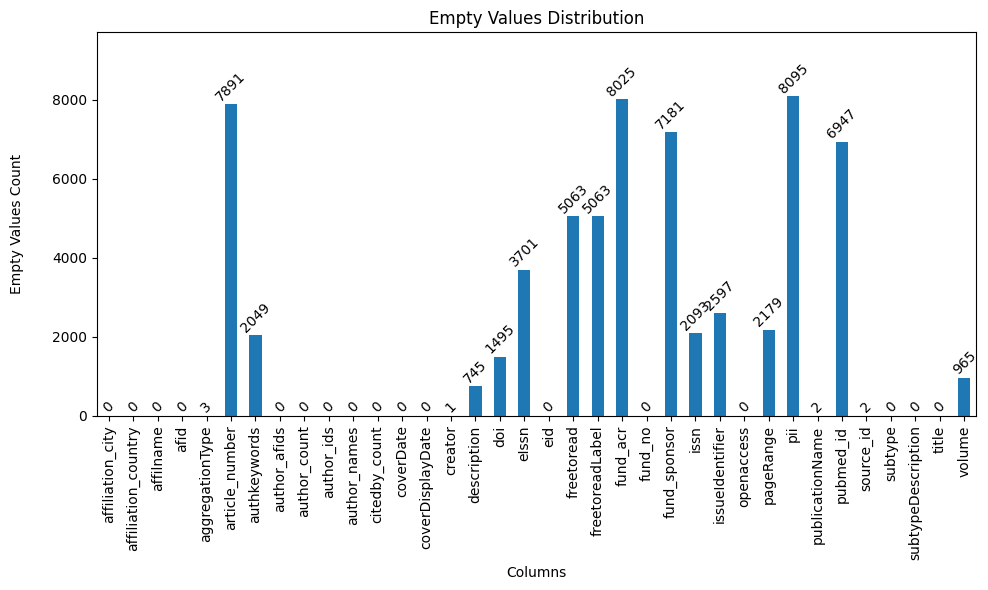

In [ ]:
# Adjust figure size
plt.figure(figsize=(10, 6))

# Visualización de vacios
ax = empty_values.plot(kind='bar')

# Add labels and title
plt.xlabel('Columns')
plt.ylabel('Empty Values Count', labelpad=20)  # Increase the label padding
plt.title('Empty Values Distribution')

# Add labels to the bars with increased spacing
for i, value in enumerate(empty_values):
    ax.text(i, value + 5, str(value), ha='center', va='bottom', rotation=45)

# Adjust margins and padding
plt.margins(y=0.2)
plt.tight_layout()

# Show the plot
plt.show()




In [ ]:
df[['author_ids', 'author_names', 'affilname']].head()

,author_ids,author_names,affilname
0,54898017800;57209011866;54988830000;5785634200...,"Corredor-Santamaría, W.;Calderón-Delgado, I. C...",Universidad de los Llanos;Pontificia Universid...
1,58189358100;57212998692;55373619400;6601953528,"Archbold, George;Parra, Carlos;Carrillo, Henry...",Pontificia Universidad Javeriana;Universiteit ...
2,56479997600;57419419300;58160053900;58160276800,"Aguilar-Garavito, Mauricio;Cortina-Segarra, Jo...",Instituto de Investigación de Recursos Biológi...
3,58094091400;57212489782;58094183500,"Aponte Amaya, Flor Marina;Escobar-Vargas, Jorg...",Universidad Nacional de Colombia;Pontificia Un...
4,56645757100;56499871900;37047886600;6602898341...,"Barreto, Elisa;Lim, Marisa C.W.;Rojas, Danny;D...","Pontificia Universidad Javeriana, Cali;Københa..."


In [ ]:
# Split the author_ids and author_names columns
df[['author_ids', 'author_names','affilname']] = df[['author_ids', 'author_names', 'affilname']].apply(lambda x: x.str.split(';'))

# Create a list of tuples with ID and Name
data = [(id, name, affi) for ids, names, affi in zip(df['author_ids'], df['author_names'], df['affilname']) for id, name, affi in zip(ids, names, affi)]

# Create a new DataFrame from the list of tuples
df_new = pd.DataFrame(data, columns=['ID', 'Name', 'Affiliation'])

# Reset the index
df_new.reset_index(drop=True, inplace=True)

# Print the new DataFrame
df_new

,ID,Name,Affiliation
0,54898017800,"Corredor-Santamaría, W.",Universidad de los Llanos
1,57209011866,"Calderón-Delgado, I. C.",Pontificia Universidad Javeriana
2,54988830000,"Arbeli, Z.",CSIC-INIA - Instituto Nacional de Investigació...
3,58189358100,"Archbold, George",Pontificia Universidad Javeriana
4,57212998692,"Parra, Carlos",Universiteit Gent
...,...,...,...
35968,53871077300,"Bernal, J. E.",Pontificia Universidad Javeriana
35969,6506495592,"Ospina, Bertha","Centro Experimental de Estudios Superiores, Ba..."
35970,7006560368,"Hunter, F. R.",Pontificia Universidad Javeriana
35971,7003974229,"Dravid, A. R.",Pontificia Universidad Javeriana


In [ ]:
words_of_interest = ['Javeriana']

mask = df_new['Affiliation'].str.contains('|'.join(words_of_interest), case=False)

df_new = df_new[mask]
df_new

,ID,Name,Affiliation
1,57209011866,"Calderón-Delgado, I. C.",Pontificia Universidad Javeriana
3,58189358100,"Archbold, George",Pontificia Universidad Javeriana
8,57419419300,"Cortina-Segarra, Jordi",Pontificia Universidad Javeriana
11,57212489782,"Escobar-Vargas, Jorge",Pontificia Universidad Javeriana
12,56645757100,"Barreto, Elisa","Pontificia Universidad Javeriana, Cali"
...,...,...,...
35958,56253161700,"Gómez, Claudia",Pontificia Universidad Javeriana
35959,6602374646,"Eudy, James D.",Pontificia Universidad Javeriana
35968,53871077300,"Bernal, J. E.",Pontificia Universidad Javeriana
35970,7006560368,"Hunter, F. R.",Pontificia Universidad Javeriana


In [ ]:
df_new[df_new['ID']=='24832026300'].value_counts('Name')

Name
Pomares-Quimbaya, Alexandra    8
Quimbaya, Alexandra Pomares    2
Pomares, Alexandra             1
dtype: int64

In [ ]:
## NEW
# Group the data by ID and aggregate the names as a list
df_grouped = df_new.groupby('ID')['Name'].agg(list).reset_index()

# Rename the 'Name' column to 'Possible Names'
df_grouped.rename(columns={'Name': 'Possible Names'}, inplace=True)

# Print the resulting dataframe
df_grouped.head()

,ID,Possible Names
0,10039158400,"[Perez, Adriana, Pérez, Adriana, Pérez, Adriana]"
1,10039484100,"[Uribe Rodríguez, Ana Fernanda, Uribe-Rodrígue..."
2,10042837000,"[Cifuentes-Rojas, Catherine]"
3,10045927300,"[Linde, Juan Máximo Molina, Molina Linde, J. M.]"
4,10046424800,"[Figueiredo, Giovany Malcher]"


In [ ]:
df_unique = df_new.drop_duplicates(subset='ID')

df_unique

,ID,Name,Affiliation
1,57209011866,"Calderón-Delgado, I. C.",Pontificia Universidad Javeriana
3,58189358100,"Archbold, George",Pontificia Universidad Javeriana
8,57419419300,"Cortina-Segarra, Jordi",Pontificia Universidad Javeriana
11,57212489782,"Escobar-Vargas, Jorge",Pontificia Universidad Javeriana
12,56645757100,"Barreto, Elisa","Pontificia Universidad Javeriana, Cali"
...,...,...,...
35956,35739049500,"Rueda-Martínez, Magaly",Pontificia Universidad Javeriana
35957,35739197900,"Solano-Flórez, Gina",Pontificia Universidad Javeriana
35958,56253161700,"Gómez, Claudia",Pontificia Universidad Javeriana
35959,6602374646,"Eudy, James D.",Pontificia Universidad Javeriana


In [ ]:
df_unique = df_unique.drop('Affiliation', axis=1)

df_unique

,ID,Name
1,57209011866,"Calderón-Delgado, I. C."
3,58189358100,"Archbold, George"
8,57419419300,"Cortina-Segarra, Jordi"
11,57212489782,"Escobar-Vargas, Jorge"
12,56645757100,"Barreto, Elisa"
...,...,...
35956,35739049500,"Rueda-Martínez, Magaly"
35957,35739197900,"Solano-Flórez, Gina"
35958,56253161700,"Gómez, Claudia"
35959,6602374646,"Eudy, James D."


In [ ]:
df_unique[df_unique['ID']=='24832026300'].value_counts('Name')

Name
Pomares-Quimbaya, Alexandra    1
dtype: int64

In [ ]:
# Create a dictionary mapping IDs to names from df_names
id_to_name = df_unique.set_index('ID')['Name'].to_dict()

# Create a function to handle missing IDs
def get_name(id_):
    if id_ in id_to_name:
        return id_to_name[id_]
    else:
        return 'Unknown'  # or any other value you want to use for missing names

# Create a new column 'Correct Name' in df_data by mapping the IDs to names
df['author_names'] = df['author_ids'].apply(lambda x: '; '.join([get_name(id_) for id_ in x]))

df['author_names'].head()

0    Unknown; Calderón-Delgado, I. C.; Arbeli, Ziv;...
1    Archbold, George; Parra, Carlos; Carrillo, Hen...
2    Aguilar, Mauricio; Cortina-Segarra, Jordi; Unk...
3              Unknown; Escobar-Vargas, Jorge; Unknown
4    Barreto, Elisa; Unknown; Rojas, Danny; Unknown...
Name: author_names, dtype: object

In [ ]:
## NEW
# Add a new column 'Correct Name' to the dataframe
df_grouped['Correct Name'] = ''

# Iterate over the rows of the dataframe
for index, row in df_grouped.iterrows():
    # Get the ID of the current row
    id = row['ID']
    
    # Lookup the ID in the dictionary and get the correct name
    correct_name = id_to_name.get(id, '')
    
    # Assign the correct name to the 'Correct Name' column
    df_grouped.at[index, 'Correct Name'] = correct_name

# Print the updated dataframe
df_grouped.head()

,ID,Possible Names,Correct Name
0,10039158400,"[Perez, Adriana, Pérez, Adriana, Pérez, Adriana]","Perez, Adriana"
1,10039484100,"[Uribe Rodríguez, Ana Fernanda, Uribe-Rodrígue...","Uribe Rodríguez, Ana Fernanda"
2,10042837000,"[Cifuentes-Rojas, Catherine]","Cifuentes-Rojas, Catherine"
3,10045927300,"[Linde, Juan Máximo Molina, Molina Linde, J. M.]","Linde, Juan Máximo Molina"
4,10046424800,"[Figueiredo, Giovany Malcher]","Figueiredo, Giovany Malcher"


In [ ]:
df_grouped.to_csv('PossibleAndCorrectNames.csv', index=False)

In [ ]:
# Save the DataFrame to an CSV file
# ***Load this CSV file into scientopy***
df.to_csv('Collection_Correct_Name_Scopus.csv', index=False)

In [ ]:
id_to_name['24832026300']

'Pomares-Quimbaya, Alexandra'

In [ ]:
id_to_name['57204838738']

'Alexandra, Pomares'

In [ ]:
# Search value
search_value = "57204838738"

# Find the row where the search value exists in the 'author_ids' column
result = df[df['author_ids'].apply(lambda x: search_value in x)]

# Print the result
result.T.to_excel('57204838738.xlsx')

In [ ]:
# Convert each row into a list of combined names without commas
df['author_names'] = df['author_names'].apply(lambda x: [''.join(name.strip().split(',')).strip() for name in x.split(';')])

# Print the updated DataFrame
df['author_names'].head()

0    [Unknown, Calderón-Delgado I. C., Arbeli Ziv, ...
1    [Archbold George, Parra Carlos, Carrillo Henry...
2    [Aguilar Mauricio, Cortina-Segarra Jordi, Unkn...
3             [Unknown, Escobar-Vargas Jorge, Unknown]
4    [Barreto Elisa, Unknown, Rojas Danny, Unknown,...
Name: author_names, dtype: object

In [ ]:
df[['author_names']]

,author_names
0,"[Unknown, Calderón-Delgado I. C., Arbeli Ziv, ..."
1,"[Archbold George, Parra Carlos, Carrillo Henry..."
2,"[Aguilar Mauricio, Cortina-Segarra Jordi, Unkn..."
3,"[Unknown, Escobar-Vargas Jorge, Unknown]"
4,"[Barreto Elisa, Unknown, Rojas Danny, Unknown,..."
...,...
10377,"[Gómez Claudia, Unknown, Arias Palacios Janeth]"
10378,"[Eudy James D., Unknown, Unknown, Unknown, Unk..."
10379,[Bernal Jaime]
10380,"[Unknown, Hunter F. R.]"


In [ ]:
# Create a network
import networkx as nx

G = nx.Graph()

for index, row in df.iterrows():
    names = row['author_names']  
    ids = row['author_afids']  
    ids = ids.split(';')

    # Add nodes to the graph
    for i in range(len(names)):
        name = names[i]
        id_ = ids[i]

        if name != 'Unknown':  # Exclude nodes with the name 'Unknown'
            # Check if the ID is already assigned to another node
            existing_nodes = [node for node in G.nodes if G.nodes[node].get('ID') == id_]

            if existing_nodes:
                # If an existing node with the same ID is found, use that node instead of creating a new one
                existing_node = existing_nodes[0]
                existing_id = G.nodes[existing_node]['ID']
                #print(f"ID conflict: {id_} already assigned to node {existing_node}. Using ID: {existing_id}")
            else:
                G.add_node(name, ID=id_)  # Add the node with a new ID

    # Add edges to the graph
    for i in range(len(names)):
        for j in range(i + 1, len(names)):
            name_i = names[i]
            name_j = names[j]
            if name_i != 'Unknown' and name_j != 'Unknown':  # Exclude edges with nodes having the name 'Unknown'
                G.add_edge(name_i, name_j)

# Access node attributes (including the IDs)
#for node in G.nodes:
#    print("Name:", node)
#    print("ID:", G.nodes[node].get('ID'))
#    print()


In [ ]:
# Save nodes and edges as a DataFrame
nodes_data = [(node, G.nodes[node].get('ID')) for node in G.nodes]
edges_data = [(edge[0], edge[1]) for edge in G.edges]

nodes_df = pd.DataFrame(nodes_data, columns=['Node', 'ID'])
edges_df = pd.DataFrame(edges_data, columns=['Source', 'Target'])

# Save the nodes and edges as separate CSV files
nodes_df.to_csv('nodes.csv', index=False)
edges_df.to_csv('edges.csv', index=False)

In [ ]:
G.nodes.data()

NodeDataView({'Corredor-Santamaría W.': {'ID': '60104325-60033545'}, 'Calderón-Delgado I. C.': {'ID': '60104325'}, 'Arbeli Z.': {'ID': '60033545'}, 'Navas J. M.': {'ID': '60006920'}, 'Velasco-Santamaría Y. M.': {'ID': '60104325'}, 'Archbold George': {'ID': '60033545-60033316-129498630'}, 'Parra Carlos': {'ID': '60033545'}, 'Carrillo Henry': {'ID': '60033545'}, 'Mouazen Abdul M.': {'ID': '60033316'}, 'Aguilar-Garavito Mauricio': {'ID': '60087090'}, 'Cortina-Segarra Jordi': {'ID': '60010844'}, 'Matoma Mauricio': {'ID': '60087090'}, 'Ignacio Barrera-Cataño José': {'ID': '60033545'}, 'Aponte Amaya Flor Marina': {'ID': '60033545'}, 'Escobar-Vargas Jorge': {'ID': '60033545'}, 'Santos Rocha Ana Carolina': {'ID': '60055696'}, 'Barreto Elisa': {'ID': '60008588-60027136'}, 'Lim Marisa C.W.': {'ID': '60026415'}, 'Rojas Danny': {'ID': '60087099-60024825'}, 'Dávalos Liliana M.': {'ID': '60026415'}, 'Wüest Rafael O.': {'ID': '60008588'}, 'Machac Antonin': {'ID': '60030840-60016605'}, 'Graham Catheri

In [ ]:
# Top 100 de nodos con mayor cantidad de enlaces
degree_dict = dict(G.degree(G.nodes()))

sorted_nodes = sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)

for node, degree in sorted_nodes[:100]:
    print("{} has degree {}".format(node, degree))

Brenner Hermann has degree 1132
Benitez Javier has degree 1113
Bolla Manjeet K. has degree 1086
Bojesen Stig E. has degree 1062
Andrulis Irene L. has degree 1034
Dennis Joe has degree 1027
Chang-Claude Jenny has degree 1012
Anton-Culver Hoda has degree 1001
Blomqvist Carl has degree 974
Beckmann Matthias W. has degree 969
Fasching Peter A. has degree 963
Burwinkel Barbara has degree 942
Aittomäki Kristiina has degree 928
Couch Fergus J. has degree 889
Brauch Hiltrud has degree 888
Hamann Ute has degree 884
Czene Kamila has degree 883
Bogdanova Natalia V. has degree 880
Michailidou Kyriaki has degree 856
Álvarez-Moreno Carlos has degree 839
Arndt Volker has degree 831
Barrero Lope H. has degree 828
Flyger Henrik has degree 814
Chanock Stephen J. has degree 810
Daly Mary B. has degree 806
Wang Qin has degree 804
Guénel Pascal has degree 769
Cox Angela has degree 756
Giles Graham G. has degree 754
Evans D. Gareth has degree 753
Dörk Thilo has degree 750
Easton Douglas F. has degree 746
Ha

In [ ]:
nodes_starting_with_prueba = [node for node in G.nodes if node.startswith('Parra') and 'Carlos' in node]
print(nodes_starting_with_prueba)

['Parra Carlos', 'Parra-López Carlos A.', 'Parra Carlos Roberto Torres']


In [ ]:
for nodes_p in nodes_starting_with_prueba:
  node = nodes_p
  G.degree[node]
  print(node, G.degree[node])

Parra Carlos 108
Parra-López Carlos A. 7
Parra Carlos Roberto Torres 2


In [ ]:
for n in nodes_starting_with_prueba:
  save_colab_network(G, n)

In [ ]:
nodes_starting_with_prueba = [node for node in G.nodes if node.startswith('Paez') and 'Carlos' in node]
print(nodes_starting_with_prueba)

['Paez-Murillo Carlos', 'Paez-Rueda Carlos Ivan', 'Paez Carlos']


In [ ]:
for nodes_p in nodes_starting_with_prueba:
  node = nodes_p
  G.degree[node]
  print(node, G.degree[node])

Paez-Murillo Carlos 1
Paez-Rueda Carlos Ivan 15
Paez Carlos 19


In [ ]:
for n in nodes_starting_with_prueba:
  save_colab_network(G, n)